 # Import Data sets

In [3]:
import os

mingw_path = 'E:\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import xgboost as xgb
import datetime as dt
from sklearn import preprocessing

In [185]:
nrows= None

store_info = pd.read_csv('store.csv')


training = pd.read_csv('train.csv', 
                       nrows=nrows,
                       parse_dates=['Date'],
                       date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))
testing = pd.read_csv('test.csv', 
                       nrows=nrows,
                       parse_dates=['Date'],
                       date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))

e:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Feature Processing

In [272]:
train_copy= training.copy()
test_copy= testing.copy()
store_info_copy= store_info.copy()

In [273]:
# Modify the value of StateHoliday- 0 and "0" mean the same
train_copy["StateHoliday"] = train_copy["StateHoliday"].map({0: 0, "0": 0, "a": "a", "b": "b", "c": "c"})
test_copy["StateHoliday"] = test_copy["StateHoliday"].map({0: 0, "0": 0, "a": "a", "b": "b", "c": "c"})

In [274]:
train_copy.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [275]:
train_copy

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [276]:
# Create DayofMonth-Day, WeekofYear, MonthofYear,Year, DayofMonth

var_name = 'Date'

train_copy[var_name + 'Day'] = pd.Index(train_copy[var_name]).day
train_copy[var_name + 'Week'] = pd.Index(train_copy[var_name]).week
train_copy[var_name + 'Month'] = pd.Index(train_copy[var_name]).month
train_copy[var_name + 'Year'] = pd.Index(train_copy[var_name]).year
train_copy[var_name + 'DayOfYear'] = pd.Index(train_copy[var_name]).dayofyear

test_copy[var_name + 'Day'] = pd.Index(test_copy[var_name]).day
test_copy[var_name + 'Week'] = pd.Index(test_copy[var_name]).week
test_copy[var_name + 'Month'] = pd.Index(test_copy[var_name]).month
test_copy[var_name + 'Year'] = pd.Index(test_copy[var_name]).year
test_copy[var_name + 'DayOfYear'] = pd.Index(test_copy[var_name]).dayofyear

In [277]:
# Rank the week with respect to its avg sales
train_copy['Rank']= 0
test_copy['Rank']= 0

rank= list(train_copy.groupby('DateWeek').Sales.mean().sort_values().index)
for week in range(1,53,1):
    rank_loc= 52-rank.index(week)
    locs= list(train_copy[train_copy['DateWeek']== week].index)
    test_locs= list(test_copy[test_copy['DateWeek']== week].index)
    train_copy.loc[locs,'Rank']= rank_loc
    test_copy.loc[test_locs,'Rank']= rank_loc 

In [278]:
train_copy

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear,Rank
0,1,5,2015-07-31,5263,555,1,1,0,1,31,31,7,2015,212,3
1,2,5,2015-07-31,6064,625,1,1,0,1,31,31,7,2015,212,3
2,3,5,2015-07-31,8314,821,1,1,0,1,31,31,7,2015,212,3
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,31,7,2015,212,3
4,5,5,2015-07-31,4822,559,1,1,0,1,31,31,7,2015,212,3
5,6,5,2015-07-31,5651,589,1,1,0,1,31,31,7,2015,212,3
6,7,5,2015-07-31,15344,1414,1,1,0,1,31,31,7,2015,212,3
7,8,5,2015-07-31,8492,833,1,1,0,1,31,31,7,2015,212,3
8,9,5,2015-07-31,8565,687,1,1,0,1,31,31,7,2015,212,3
9,10,5,2015-07-31,7185,681,1,1,0,1,31,31,7,2015,212,3


In [279]:
# Convert into numeric variable
store_info_copy['StoreType'] = store_info_copy['StoreType'].astype('category').cat.codes
store_info_copy['Assortment'] = store_info_copy['Assortment'].astype('category').cat.codes

In [280]:
store_info_copy

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,0,0,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,0,2,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,0,0,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,0,2,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,0,0,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [281]:
# Create dummy variables of PromoInterval
temp = store_info_copy['PromoInterval'].str.split(',').apply(pd.Series, 1)
temp.columns = ['PromoInterval0', 'PromoInterval1', 'PromoInterval2', 'PromoInterval3']
store_info_copy = store_info_copy.join(temp)

In [282]:
store_info_copy.PromoInterval0= store_info_copy.PromoInterval0.apply(lambda x: 1 if str(x) == 'Jan' else np.nan)
store_info_copy.PromoInterval1= store_info_copy.PromoInterval1.apply(lambda x: 4 if str(x) == 'Apr' else np.nan)
store_info_copy.PromoInterval2= store_info_copy.PromoInterval2.apply(lambda x: 7 if str(x) == 'Jul' else np.nan)
store_info_copy.PromoInterval3= store_info_copy.PromoInterval3.apply(lambda x: 11 if str(x) == 'Oct' else np.nan)

In [283]:
store_info_copy.drop('PromoInterval',axis=1, inplace=True)
store_info_copy

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1.0,4.0,7.0,11.0
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1.0,4.0,7.0,11.0
3,4,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0,0,310.0,12.0,2013.0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,2,24000.0,4.0,2013.0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0,0,7520.0,10.0,2014.0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0,2,2030.0,8.0,2000.0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0,0,3160.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
# Calculate the avg sale of each store
temp_Sale_day= train_copy[(train_copy.Open==1)&(train_copy.Sales !=0)].groupby('Store').Sales.sum()/train_copy[(train_copy.Open==1)&(train_copy.Sales !=0)].groupby('Store').Open.count()
train_copy = pd.merge(train_copy, temp_Sale_day.reset_index(name='avgSales'), how='left', on=['Store'])
test_copy = pd.merge(test_copy, temp_Sale_day.reset_index(name='avgSales'), how='left', on=['Store'])

In [285]:
train_copy

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear,Rank,avgSales
0,1,5,2015-07-31,5263,555,1,1,0,1,31,31,7,2015,212,3,4759.096031
1,2,5,2015-07-31,6064,625,1,1,0,1,31,31,7,2015,212,3,4953.900510
2,3,5,2015-07-31,8314,821,1,1,0,1,31,31,7,2015,212,3,6942.568678
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,31,7,2015,212,3,9638.401786
4,5,5,2015-07-31,4822,559,1,1,0,1,31,31,7,2015,212,3,4676.274711
5,6,5,2015-07-31,5651,589,1,1,0,1,31,31,7,2015,212,3,5509.946154
6,7,5,2015-07-31,15344,1414,1,1,0,1,31,31,7,2015,212,3,8817.050891
7,8,5,2015-07-31,8492,833,1,1,0,1,31,31,7,2015,212,3,5539.358418
8,9,5,2015-07-31,8565,687,1,1,0,1,31,31,7,2015,212,3,6562.337612
9,10,5,2015-07-31,7185,681,1,1,0,1,31,31,7,2015,212,3,5568.420918


## Remove Outliers

In [286]:
def Detect_Outliers(points, thresh=3):
    mean = np.mean(points, axis=0)
    std= np.std(points, axis=0)
    diffs = ((points - mean)**2)
    diffs = np.sqrt(diffs)
    z_score= diffs/std
    
    return z_score > thresh

for i in train_copy['Store'].unique():
    train_copy.loc[(train_copy['Store'] == i) & (train_copy['Open'] == 1), 'Outlier'] = \
        Detect_Outliers(train_copy.loc[(train_copy['Store'] == i) & (train_copy['Open'] == 1)]['Sales'])

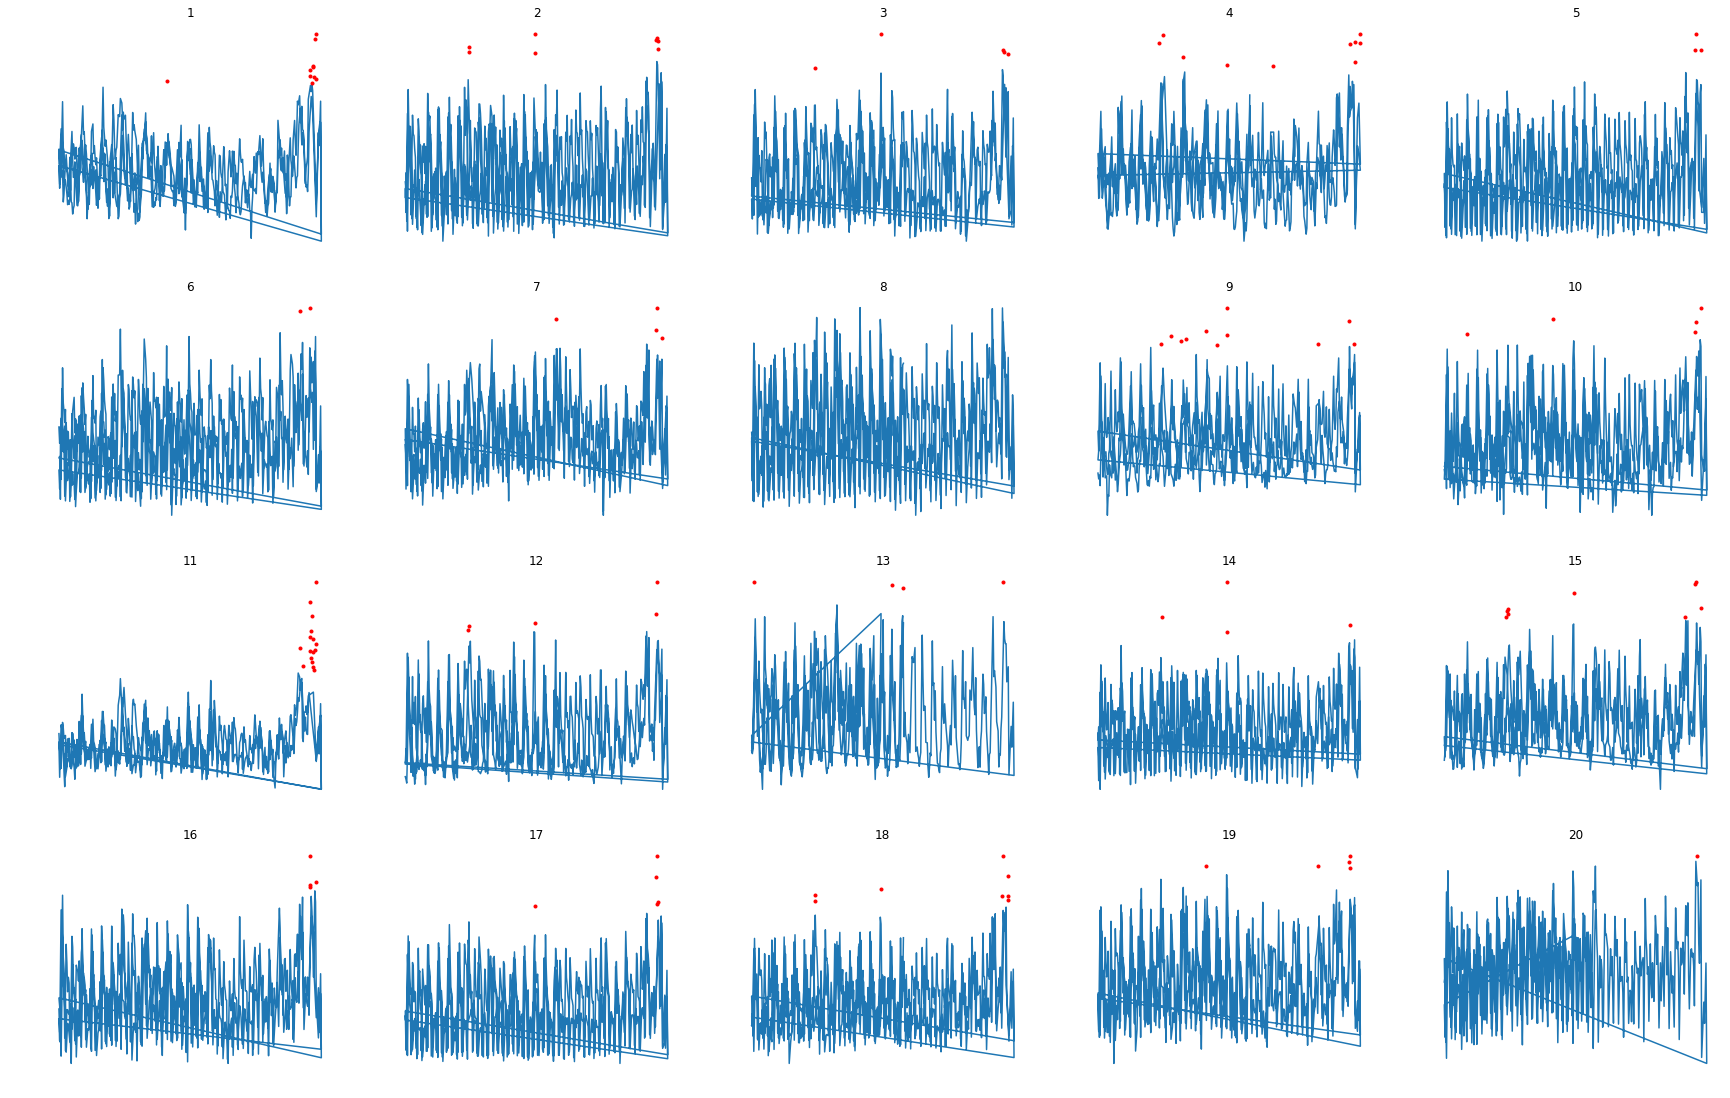

In [287]:
plt.rcParams["figure.figsize"] = [30,100]

for i in range(1,21):

    sales= train_copy[(train_copy.Store==i)&(train_copy.Outlier== False)].Sales
    day_sale= train_copy[(train_copy.Store==i)&(train_copy.Outlier== False)].DateDayOfYear
    abnomal_sales= train_copy[(train_copy.Store==i)&(train_copy.Outlier== True)].Sales
    day_absale= train_copy[(train_copy.Store==i)&(train_copy.Outlier== True)].DateDayOfYear
    
    plt.subplot(20,5,i)
    plt.plot(day_sale, sales, '-')
    plt.plot(day_absale, abnomal_sales, 'r.')
    plt.title(i)
    plt.axis('off')

In [467]:
# Log-transform

train_copy.Sales= np.log(train_copy.Sales)
train_copy

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear,Rank,avgSales,Outlier,day_to_holiday,day_from_holiday,avgCust_y
0,1,5,2015-07-31,8.568456,555,1,1,0,1,31,31,7,2015,212,3,4759.096031,False,15.0,57.0,564.049936
1,2,5,2015-07-31,8.710125,625,1,1,0,1,31,31,7,2015,212,3,4953.900510,False,15.0,57.0,583.998724
2,3,5,2015-07-31,9.025696,821,1,1,0,1,31,31,7,2015,212,3,6942.568678,False,15.0,57.0,750.077022
3,4,5,2015-07-31,9.546455,1498,1,1,0,1,31,31,7,2015,212,3,9638.401786,False,15.0,57.0,1321.752551
4,5,5,2015-07-31,8.480944,559,1,1,0,1,31,31,7,2015,212,3,4676.274711,False,15.0,57.0,537.340180
5,6,5,2015-07-31,8.639588,589,1,1,0,1,31,31,7,2015,212,3,5509.946154,False,15.0,57.0,635.234615
6,7,5,2015-07-31,9.638480,1414,1,1,0,1,31,31,7,2015,212,3,8817.050891,False,15.0,57.0,948.561069
7,8,5,2015-07-31,9.046880,833,1,1,0,1,31,31,7,2015,212,3,5539.358418,False,15.0,57.0,658.197704
8,9,5,2015-07-31,9.055439,687,1,1,0,1,31,31,7,2015,212,3,6562.337612,False,15.0,57.0,579.816431
9,10,5,2015-07-31,8.879751,681,1,1,0,1,31,31,7,2015,212,3,5568.420918,False,15.0,57.0,593.955357


## Merge data

In [327]:
# Remove closed and sale=0 and outlier data
train_copy_not0= train_copy[(train_copy.Open==1)&(train_copy.Sales != np.NINF)&(train_copy.Outlier== False)]


training= pd.merge(train_copy_not0,store_info_copy,on='Store')
testing= pd.merge(test_copy,store_info_copy,on='Store')
target= training.Sales
training.StateHoliday= training['StateHoliday'].astype('category').cat.codes
testing.StateHoliday= testing['StateHoliday'].astype('category').cat.codes

training.drop(['Sales', 'Customers','Outlier','Date',],axis=1,inplace=True)
testing.drop('Date',axis=1,inplace=True)

Id=pd.merge(test_copy,store_info_copy,on='Store').Id

In [332]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 26 columns):
Id                           41088 non-null int64
Store                        41088 non-null int64
DayOfWeek                    41088 non-null int64
Open                         41077 non-null float64
Promo                        41088 non-null int64
StateHoliday                 41088 non-null int8
SchoolHoliday                41088 non-null int64
DateDay                      41088 non-null int64
DateWeek                     41088 non-null int64
DateMonth                    41088 non-null int64
DateYear                     41088 non-null int64
DateDayOfYear                41088 non-null int64
Rank                         41088 non-null int64
avgSales                     41088 non-null float64
StoreType                    41088 non-null int8
Assortment                   41088 non-null int8
CompetitionDistance          40992 non-null float64
CompetitionOpenSinceMonth    25872 non

In [330]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837685 entries, 0 to 837684
Data columns (total 25 columns):
Store                        837685 non-null int64
DayOfWeek                    837685 non-null int64
Open                         837685 non-null int64
Promo                        837685 non-null int64
StateHoliday                 837685 non-null int8
SchoolHoliday                837685 non-null int64
DateDay                      837685 non-null int64
DateWeek                     837685 non-null int64
DateMonth                    837685 non-null int64
DateYear                     837685 non-null int64
DateDayOfYear                837685 non-null int64
Rank                         837685 non-null int64
avgSales                     837685 non-null float64
StoreType                    837685 non-null int8
Assortment                   837685 non-null int8
CompetitionDistance          835517 non-null float64
CompetitionOpenSinceMonth    571312 non-null float64
CompetitionOpenSinc

In [333]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(training,target,test_size=0.1, random_state=42)

In [334]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

def rmspe_xg(yhat, y):
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

## Model1

In [335]:
dtrain = xgb.DMatrix(X_train, Y_train)
dtest = xgb.DMatrix(X_test, Y_test)

evallist = [(dtrain, 'train'), (dtest, 'test')]

params = {'bst:max_depth':12,
         'bst:eta':0.0095,
         'subsample':0.8,
         'colsample_bytree':0.7,
         'silent':1, 
         'objective':'reg:linear',
         'nthread':-1,
         'seed':42}


bst1 = xgb.train(params, dtrain, 20000, evallist, feval=rmspe_xg, verbose_eval=250, early_stopping_rounds=250)

[0]	train-rmse:5.78589	test-rmse:5.78612	train-rmspe:0.996896	test-rmspe:0.996897
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 250 rounds.
[250]	train-rmse:0.108349	test-rmse:0.110268	train-rmspe:0.148529	test-rmspe:0.118334
[500]	train-rmse:0.096144	test-rmse:0.099493	train-rmspe:0.138159	test-rmspe:0.107226
[750]	train-rmse:0.090149	test-rmse:0.09474	train-rmspe:0.127195	test-rmspe:0.102231
[1000]	train-rmse:0.08644	test-rmse:0.092255	train-rmspe:0.114815	test-rmspe:0.099653
[1250]	train-rmse:0.083724	test-rmse:0.090625	train-rmspe:0.101378	test-rmspe:0.097885
[1500]	train-rmse:0.081651	test-rmse:0.08953	train-rmspe:0.091953	test-rmspe:0.096803
[1750]	train-rmse:0.079911	test-rmse:0.088721	train-rmspe:0.089615	test-rmspe:0.095835
[2000]	train-rmse:0.078425	test-rmse:0.088201	train-rmspe:0.086632	test-rmspe:0.095359
[2250]	train-rmse:0.077147	test-rmse:0.087748	train-rmspe:0.085082	test-rmspe:0.09

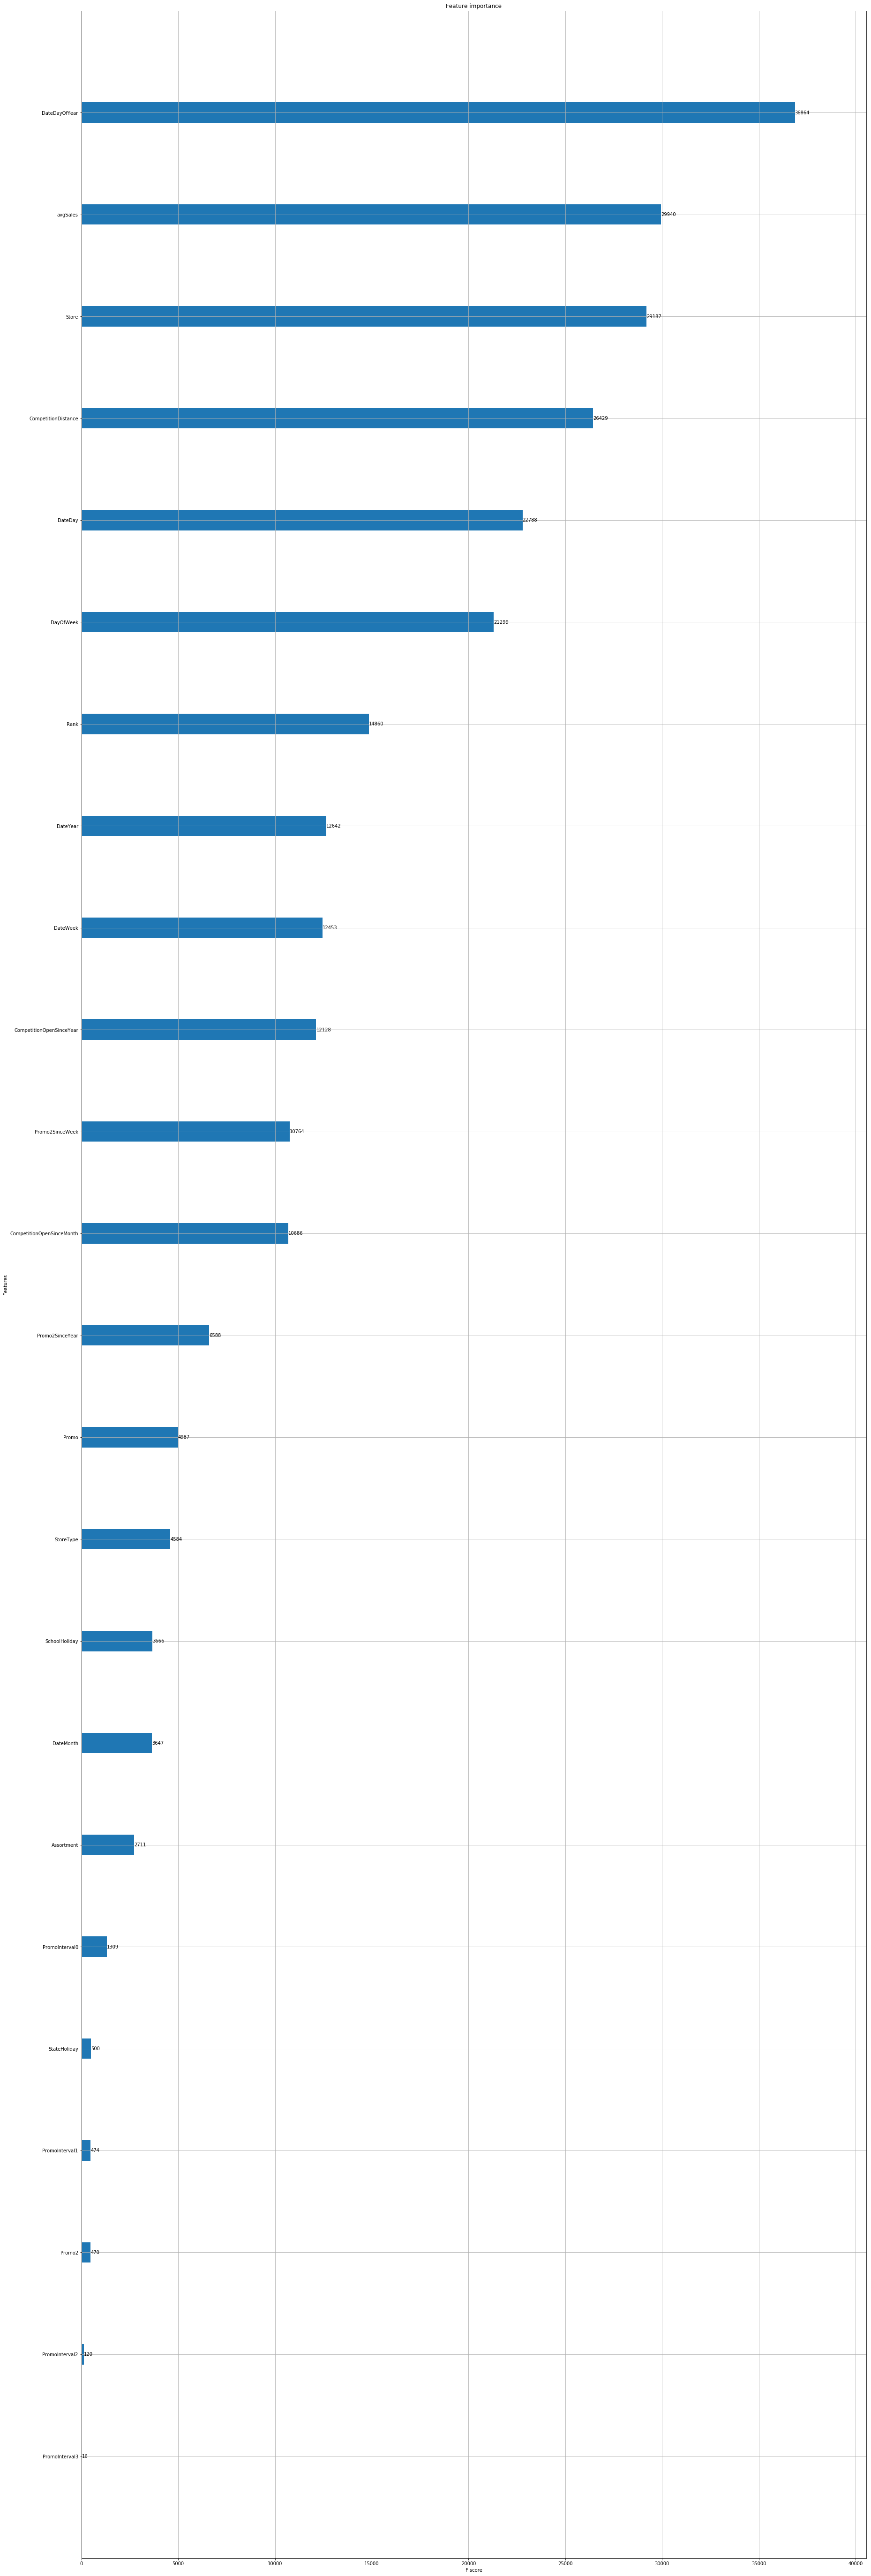

In [415]:
xgb.plot_importance(bst1)

In [389]:
# Save Model1
#bst1.save_model('model1.model')

In [426]:
# Predict outcome

test_x = xgb.DMatrix(testing)

y_predict_1= bst1.predict(test_x)


In [427]:
y_predict_1= np.exp(y_predict_1)
y_predict_1

array([ 3864.2078,  4088.702 ,  4235.83  , ..., 10513.115 ,  7471.214 ,
        7192.3657], dtype=float32)

In [428]:
test= pd.read_csv('test.csv')
submit= Id.reset_index()
submit.drop('index',axis=1, inplace=True)
submit['Sales']= y_predict_1
submit[['Id', 'Sales']].to_csv('submit1.csv', index=False)

Due to the minimum score required is 0.11773,so I use other ways to achieve the score...

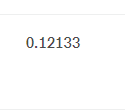

## Model2 and further feature processing

In [460]:
# Calculate avg Customers per day of each sotre
CustperDay= train_copy[(train_copy.Open==1)&(train_copy.Sales !=0)].groupby('Store').Customers.sum()/train_copy[(train_copy.Open==1)&(train_copy.Sales !=0)].groupby('Store').Open.count()
train_copy = pd.merge(train_copy, CustperDay.reset_index(name='avgCust_y'), how='left', on=['Store'])
test_copy = pd.merge(test_copy, CustperDay.reset_index(name='avgCust_y'), how='left', on=['Store'])

In [410]:
train_copy.Date= train_copy.Date.astype(str)
test_copy.Date= test_copy.Date.astype(str)

In [411]:
def change_to_datetime(list_):
    """Change str to datetime object"""
    new= []
    for i in list_:
        date = dt.datetime.strptime(i,'%Y-%m-%d')
        new.append(date)
    return new

# acquire all state holiday dates
state_holiday= train_copy.Date[train_copy.StateHoliday!=0].unique().tolist() # from training set
state_holiday_= test_copy.Date[test_copy.StateHoliday=='a'].unique().tolist() # from testing set
state_holiday.append(state_holiday_[0])
state_holiday.append('2015-09-19') 

# Add an extra holiday date to calculate days to holiday(how long to the next nearest holiday)
# Reference https://www.officeholidays.com/countries/germany/2015.php an additional holiday date
state_holiday= change_to_datetime(state_holiday)

In [412]:
def days_to_holiday(dataset):
    """Take dataset as input and also call the output from change_to_datetime()
        then calculate the day to/from latest holidays
    """
    
    # Initialize two column with values equal to its Store number
    dataset.day_to_holiday= dataset.Store 
    dataset.day_from_holiday= dataset.Store
    dates_unique= dataset.Date.astype(str).unique().tolist() # Load all unique dates in dataset

    for current in dates_unique:
        current_date= dt.datetime.strptime(current,'%Y-%m-%d')
        
        smallest_positive= 5000 # set the default value of oncoming holiday 
        biggest_negative= -5000 # set the default value of past holiday
        
        for holiday_date in state_holiday: # Loop for all state holiday and calculate the gap with current date
            gap = (holiday_date- current_date).days
            if gap > 0:
                if gap < smallest_positive:
                    smallest_positive= gap
            elif gap <0:
                if gap > biggest_negative:
                    biggest_negative= gap
            else:
                smallest_positive= gap
                biggest_negative= gap
            
        dataset.loc[dataset.Date== current,'day_to_holiday']= smallest_positive
        dataset.loc[dataset.Date== current,'day_from_holiday']= abs(biggest_negative)
        
    return dataset

In [413]:
train_copy= days_to_holiday(train_copy)
test_copy= days_to_holiday(test_copy)

In [469]:
# Change data format
train_copy.day_to_holiday = train_copy.day_to_holiday.astype(int)
train_copy.day_from_holiday= train_copy.day_from_holiday.astype(int)

In [471]:
test_copy.day_to_holiday = test_copy.day_to_holiday.astype(int)
test_copy.day_from_holiday= test_copy.day_from_holiday.astype(int)

In [473]:
# Merge Data

train_copy_not0_1= train_copy[(train_copy.Open==1)&(train_copy.Sales != np.NINF)&(train_copy.Outlier== False)]


training_1= pd.merge(train_copy_not0_1,store_info_copy,on='Store')
testing_1= pd.merge(test_copy,store_info_copy,on='Store')
target= training_1.Sales
training_1.StateHoliday= training_1['StateHoliday'].astype('category').cat.codes
testing_1.StateHoliday= testing_1['StateHoliday'].astype('category').cat.codes

training_1.drop(['Sales', 'Customers','Outlier','Date',],axis=1,inplace=True)
testing_1.drop('Date',axis=1,inplace=True)


In [474]:
X_train, X_test, Y_train, Y_test= train_test_split(training_1,target,test_size=0.1, random_state=233)

In [483]:
dtrain = xgb.DMatrix(X_train, Y_train)
dtest = xgb.DMatrix(X_test, Y_test)

evallist = [(dtrain, 'train'), (dtest, 'test')]

params = {'bst:max_depth':12,
         'bst:eta':0.0095,
         'subsample':0.8,
         'colsample_bytree':0.7,
         'silent':1, 
         'objective':'reg:linear',
         'nthread':6,
         'seed':233}


bst2 = xgb.train(params, dtrain, 4000, evallist, feval=rmspe_xg, verbose_eval=250, early_stopping_rounds=250)

[0]	train-rmse:5.78596	test-rmse:5.78494	train-rmspe:0.996897	test-rmspe:0.996895
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 250 rounds.
[250]	train-rmse:0.105777	test-rmse:0.108672	train-rmspe:0.154733	test-rmspe:0.117747
[500]	train-rmse:0.095041	test-rmse:0.099772	train-rmspe:0.10951	test-rmspe:0.108143
[750]	train-rmse:0.088561	test-rmse:0.094924	train-rmspe:0.100024	test-rmspe:0.103125
[1000]	train-rmse:0.084679	test-rmse:0.092555	train-rmspe:0.095557	test-rmspe:0.100717
[1250]	train-rmse:0.081787	test-rmse:0.09085	train-rmspe:0.092115	test-rmspe:0.098914
[1500]	train-rmse:0.079503	test-rmse:0.089703	train-rmspe:0.088008	test-rmspe:0.097571
[1750]	train-rmse:0.077639	test-rmse:0.088943	train-rmspe:0.083824	test-rmspe:0.096596
[2000]	train-rmse:0.075988	test-rmse:0.088352	train-rmspe:0.081825	test-rmspe:0.095889
[2250]	train-rmse:0.074573	test-rmse:0.087998	train-rmspe:0.07923	test-rmspe:0.09

In [495]:
# Save Model2
#bst2.save_model('model2.model')

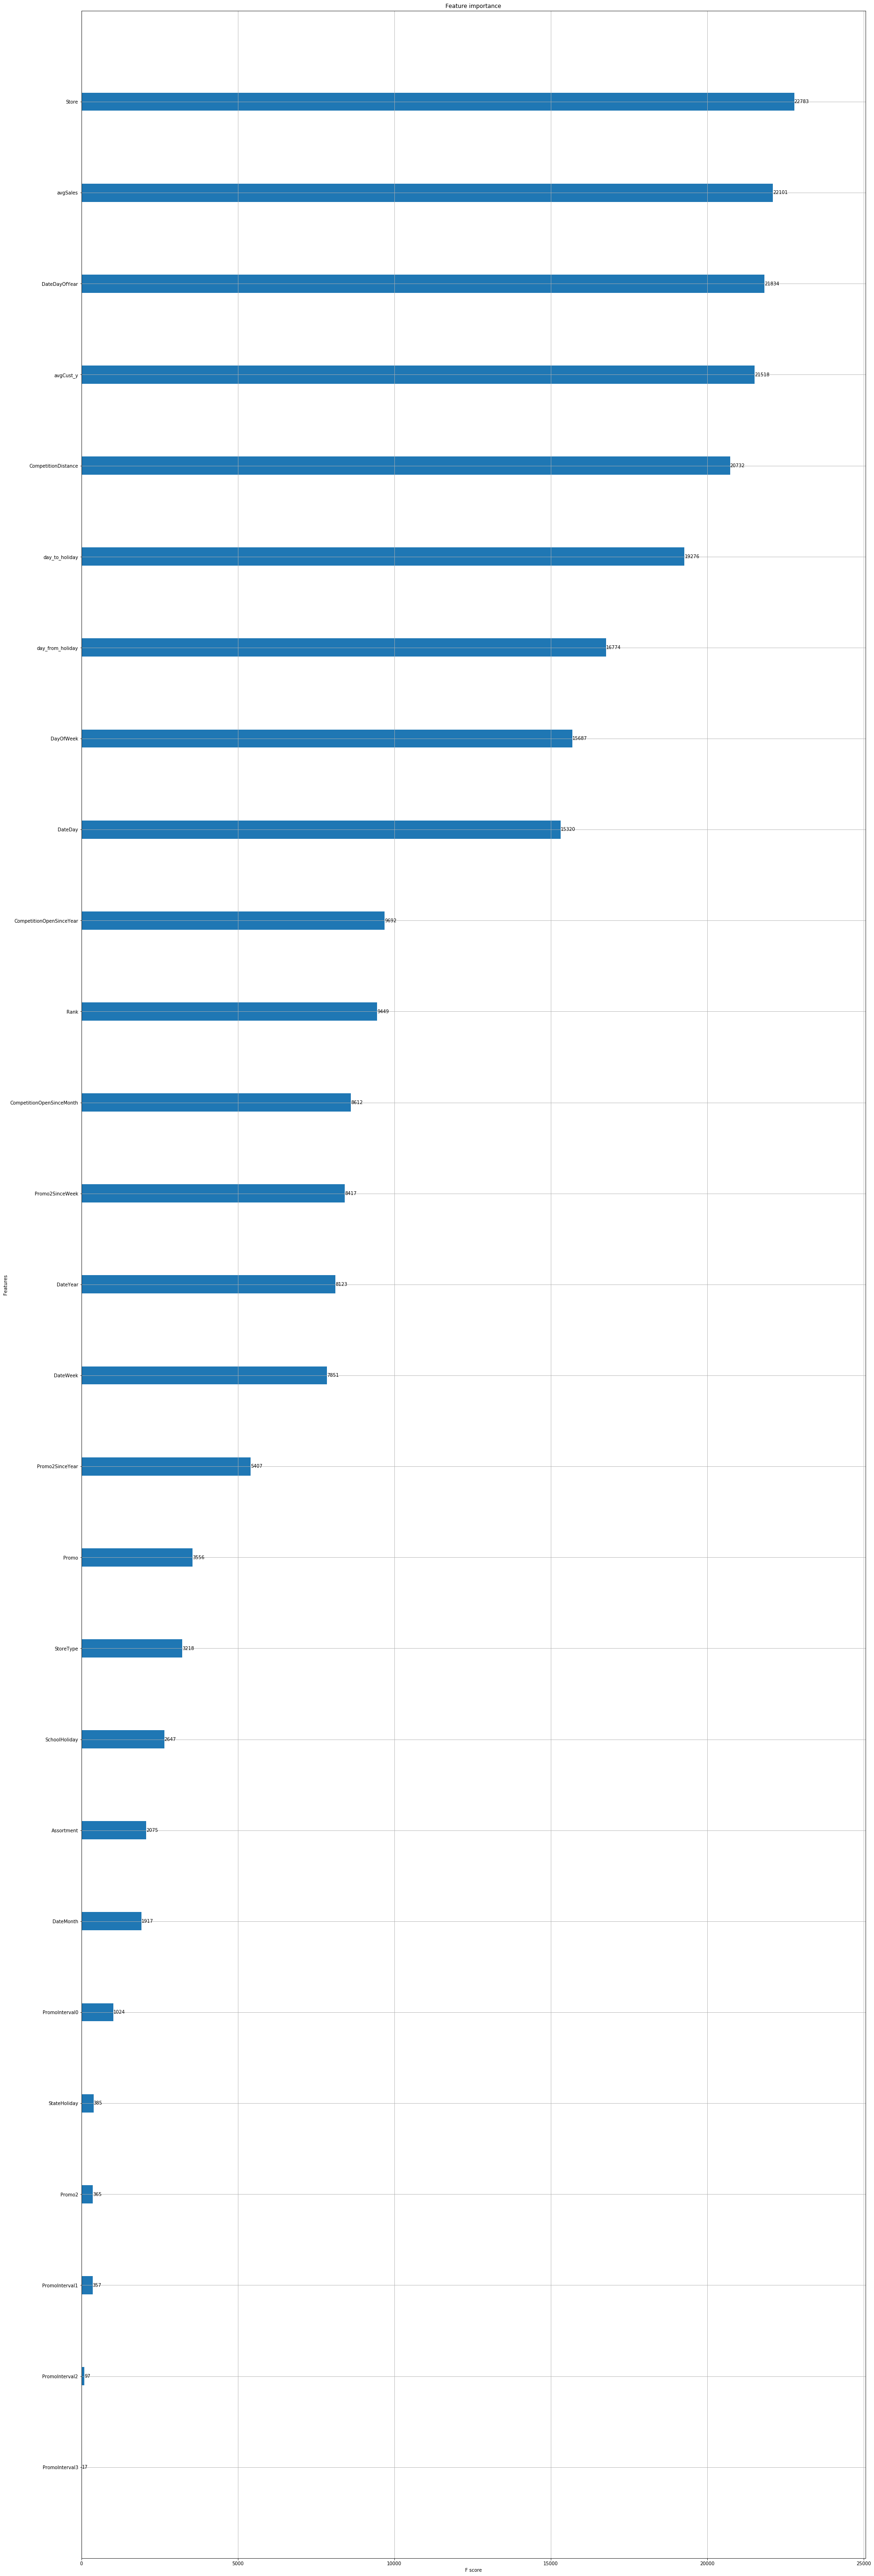

In [484]:
xgb.plot_importance(bst2)

In [486]:
#testing_1= testing_1.drop('Id',axis=1)

test_x = xgb.DMatrix(testing_1)

y_predict_2= bst2.predict(test_x)

y_predict_2= np.exp(y_predict_2)
y_predict_2

array([4611.2686, 4954.3647, 5051.652 , ..., 9603.526 , 5686.2393,
       7359.432 ], dtype=float32)

In [487]:
test= pd.read_csv('test.csv')
submit1= Id.reset_index()
submit1.drop('index',axis=1, inplace=True)
submit1['Sales']= y_predict_2
submit1[['Id', 'Sales']].to_csv('submit2.csv', index=False)

![base result](model2.png)

## Model3

In [500]:
training_2= training_1.drop(['day_to_holiday','day_from_holiday'], axis=1)
testing_2= testing_1.drop(['day_to_holiday','day_from_holiday'], axis=1)

In [504]:
X_train, X_test, Y_train, Y_test= train_test_split(training_2,target,test_size=0.1, random_state=2333)

In [505]:
dtrain = xgb.DMatrix(X_train, Y_train)
dtest = xgb.DMatrix(X_test, Y_test)

evallist = [(dtrain, 'train'), (dtest, 'test')]

params = {'bst:max_depth':12,
         'bst:eta':0.001,
         'subsample':0.8,
         'colsample_bytree':0.7,
         'silent':1, 
         'objective':'reg:linear',
         'nthread':6,
         'seed':2333}


bst3 = xgb.train(params, dtrain, 4000, evallist, feval=rmspe_xg, verbose_eval=250, early_stopping_rounds=250)

[0]	train-rmse:5.78605	test-rmse:5.78389	train-rmspe:0.996896	test-rmspe:0.996889
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 250 rounds.
[250]	train-rmse:0.105618	test-rmse:0.107744	train-rmspe:0.145071	test-rmspe:0.116355
[500]	train-rmse:0.094473	test-rmse:0.098276	train-rmspe:0.127882	test-rmspe:0.106306
[750]	train-rmse:0.088895	test-rmse:0.094103	train-rmspe:0.119047	test-rmspe:0.102096
[1000]	train-rmse:0.085313	test-rmse:0.091894	train-rmspe:0.098221	test-rmspe:0.099634
[1250]	train-rmse:0.082662	test-rmse:0.090409	train-rmspe:0.094957	test-rmspe:0.097941
[1500]	train-rmse:0.080723	test-rmse:0.089418	train-rmspe:0.08987	test-rmspe:0.096918
[1750]	train-rmse:0.079018	test-rmse:0.088769	train-rmspe:0.088008	test-rmspe:0.096364
[2000]	train-rmse:0.07762	test-rmse:0.088201	train-rmspe:0.085694	test-rmspe:0.095828
[2250]	train-rmse:0.07641	test-rmse:0.087867	train-rmspe:0.08407	test-rmspe:0.095

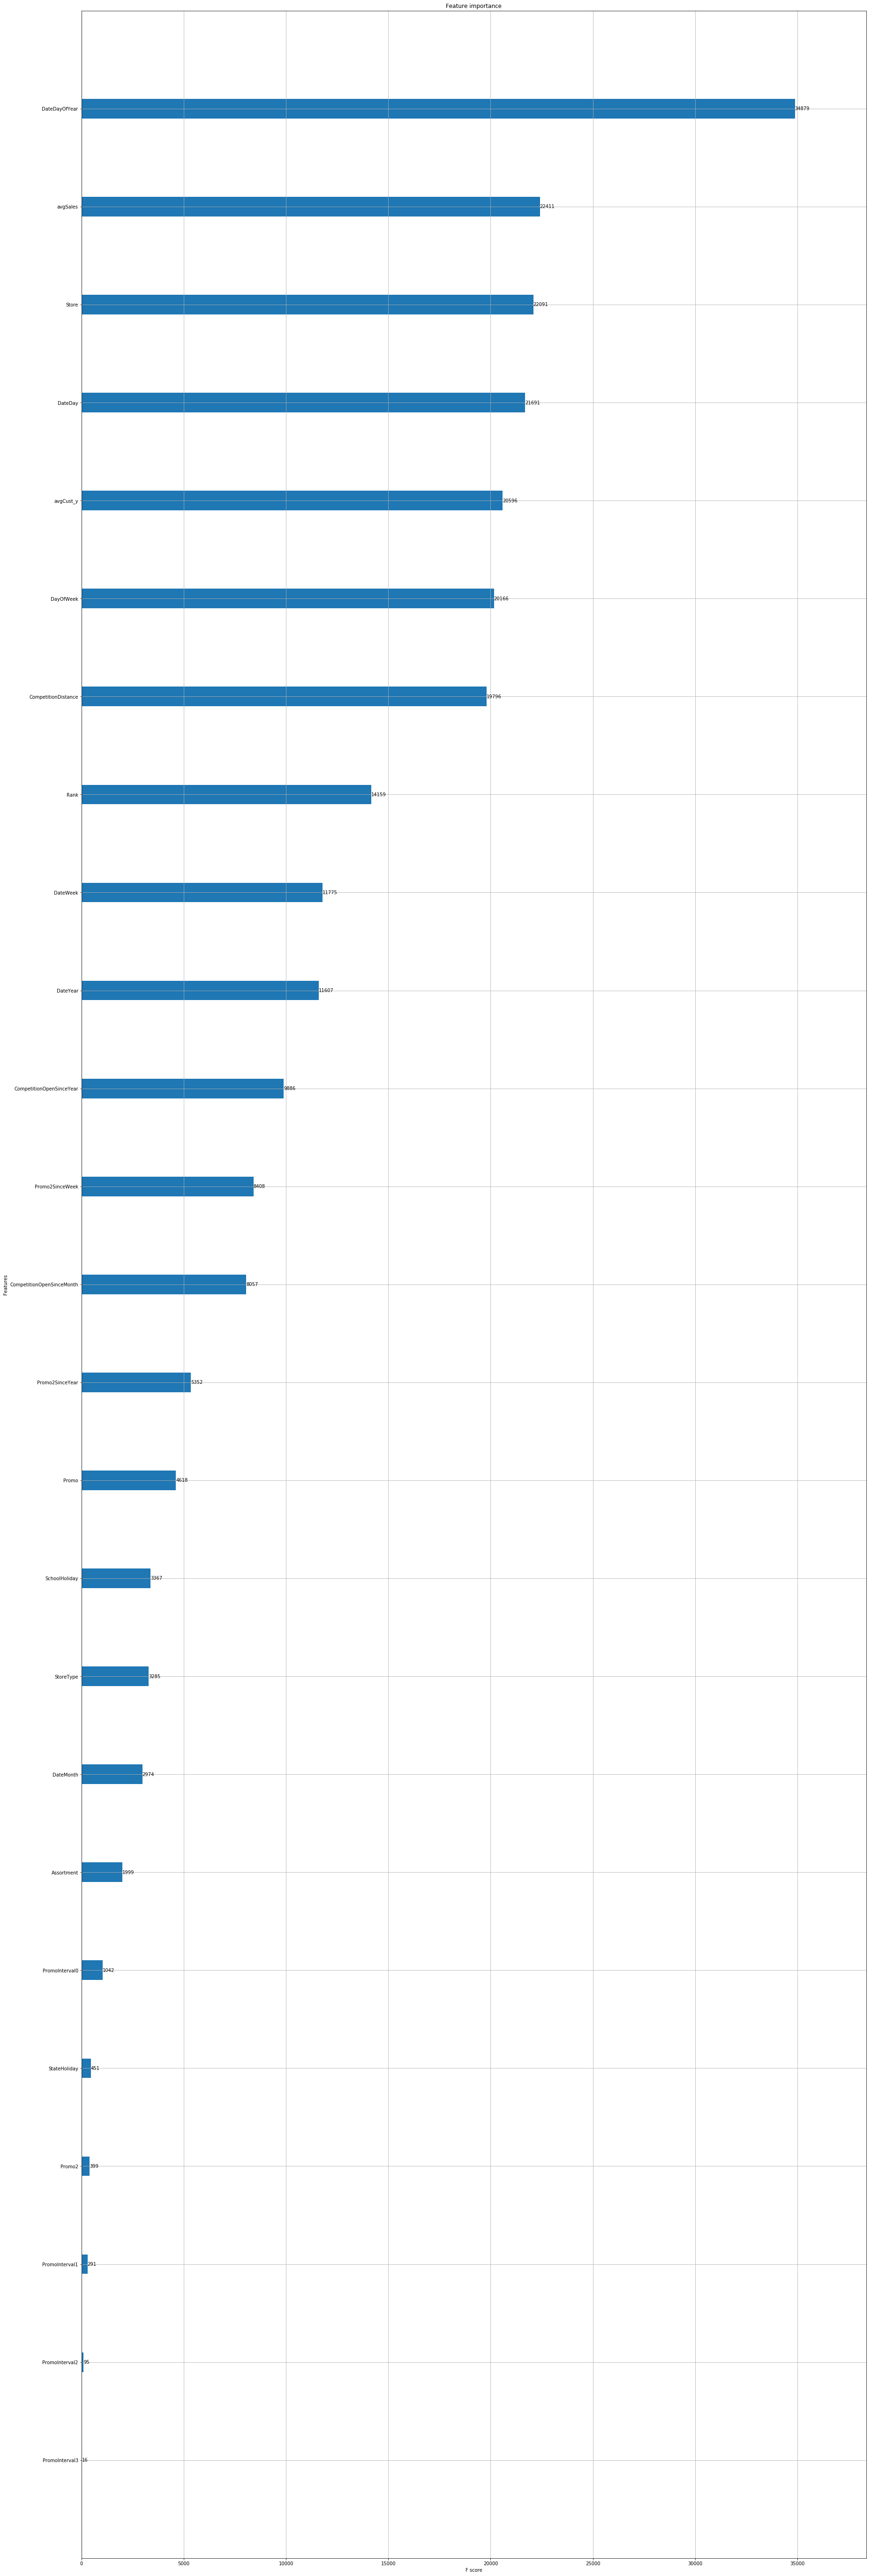

In [512]:
xgb.plot_importance(bst3)

In [507]:
# Save Model3

#bst3.save_model('model3.model')

In [510]:
test_x = xgb.DMatrix(testing_2)

y_predict_3= bst3.predict(test_x)

y_predict_3= np.exp(y_predict_3)
y_predict_3

array([3969.6008, 4368.777 , 4869.9688, ..., 9397.6   , 6578.8643,
       7564.5537], dtype=float32)

In [511]:
test= pd.read_csv('test.csv')
submit3= Id.reset_index()
submit3.drop('index',axis=1, inplace=True)
submit3['Sales']= y_predict_3
submit3[['Id', 'Sales']].to_csv('submit3.csv', index=False)

![base result](model3.png)

## Calculate the weighted average of 3 different models

In [515]:
test= pd.read_csv('test.csv')
submit2= Id.reset_index()
submit2.drop('index',axis=1, inplace=True)
submit2['Sales']= (1.35*y_predict_1+0.5*y_predict_2+1.15*y_predict_3)/3
submit2[['Id', 'Sales']].to_csv('submit4.csv', index=False)

![base result](final.png)

## Summary&Visualization

In [554]:
X_train_2, X_test_2, Y_train_all, Y_test_all= train_test_split(training_1,target,test_size=0.1, random_state=1)

In [560]:
X_test_1= X_test_2.drop(['avgCust_y','day_to_holiday','day_from_holiday'],axis=1)

In [561]:
X_test_3= X_test_2.drop(['day_to_holiday','day_from_holiday'],axis=1)

In [564]:
X_test_1_D = xgb.DMatrix(X_test_1)
X_test_2_D = xgb.DMatrix(X_test_2)
X_test_3_D = xgb.DMatrix(X_test_3)


validation_1= bst1.predict(X_test_1_D)
validation_2= bst2.predict(X_test_2_D)
validation_3= bst3.predict(X_test_3_D)

In [568]:
validation_final= (np.exp(validation_1)*1.35+np.exp(validation_2)*0.5+np.exp(validation_3)*1.15)/3

In [571]:
Y_test_all=np.exp(Y_test_all)
Y_test_all=Y_test_all.reset_index()
Y_test_all['Predict_Sales']= validation_final

Text(0.5,1,'Prediction vs Real Sales')

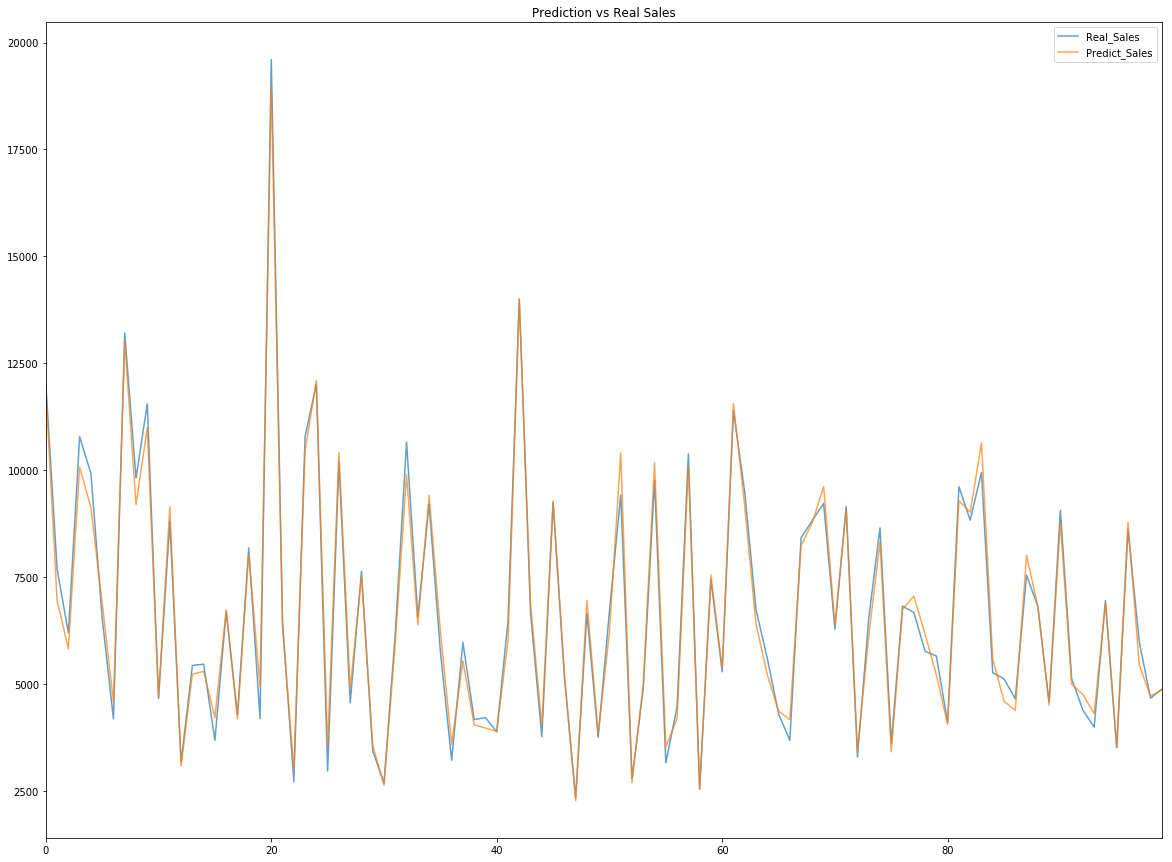

In [601]:
plt.figure(figsize=(20,15))
Y_test_all[:100].Sales.plot(label='Real_Sales',alpha=.7)
Y_test_all[:100].Predict_Sales.plot(label='Predict_Sales',alpha=.7)
plt.legend()
plt.title('Prediction vs Real Sales')